In [ ]:
import pandas as pd

In [2]:
# Cargando el dataset
df = pd.read_csv("/workspaces/Practica3_GR_6/BitcoinHeistData.csv")

In [3]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [4]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [5]:
# Dimensión del archivo
print(df.shape)

(126, 10)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label
princetoncerber    6
princetonlocky     4
Name: count, dtype: int64


/tmp/ipykernel_32236/249137392.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df_filtered, palette="coolwarm")


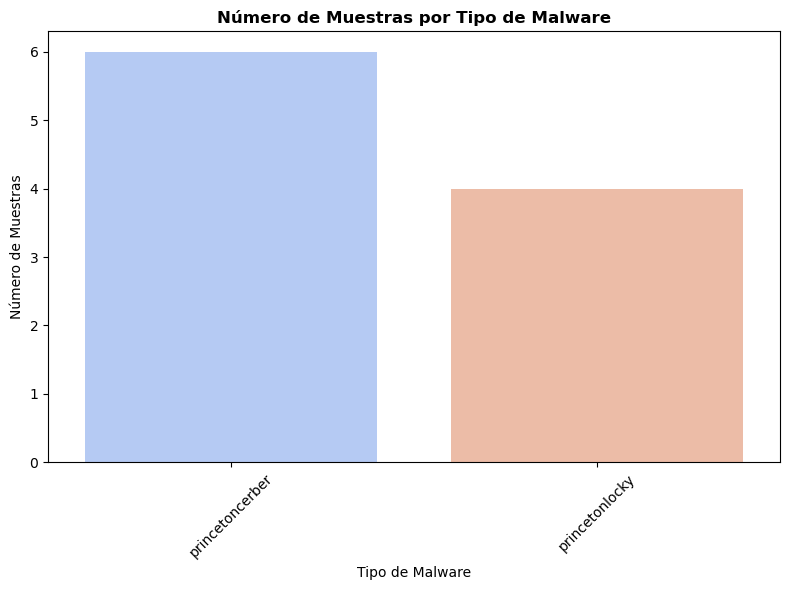

In [7]:
# Eliminar espacios en blanco antes y después de los nombres de malware
df['label'] = df['label'].str.strip().str.lower()

# Seleccionar solo las primeras 10 filas
df_first_10 = df.head(10)

# Filtrar solo los dos tipos de malware relevantes: 'princetoncerber' y 'princetonlocky' en las primeras 10 muestras
df_filtered = df_first_10[df_first_10['label'].isin(['princetoncerber', 'princetonlocky'])]

# Verificar cuántas muestras hay de cada tipo de malware después del filtrado
print(df_filtered['label'].value_counts())

# 1. Gráfico de barras para el número de muestras por tipo de malware
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df_filtered, palette="coolwarm")
plt.title("Número de Muestras por Tipo de Malware", fontsize=12, fontweight="bold")
plt.xlabel("Tipo de Malware")
plt.ylabel("Número de Muestras")
plt.xticks(rotation=45)  # Para mejorar la visualización de las etiquetas
plt.tight_layout()
plt.show()

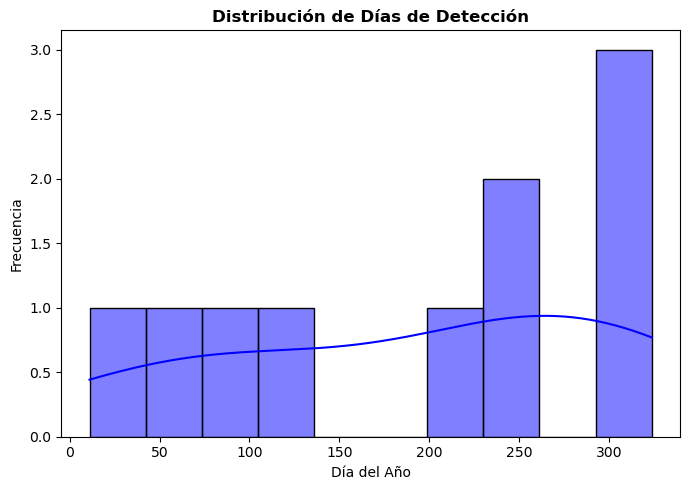

In [8]:

# Seleccionar solo las primeras 10 filas
df_first_10 = df.head(10)

# 2. Gráfico de distribución: Días en los que se detectaron los eventos
plt.figure(figsize=(7, 5))
sns.histplot(df_first_10["day"], bins=10, kde=True, color="blue")
plt.title("Distribución de Días de Detección", fontsize=12, fontweight="bold")
plt.xlabel("Día del Año")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

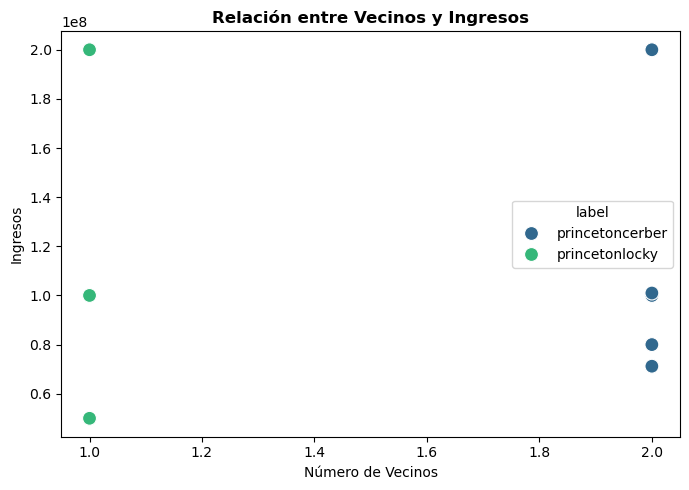

In [9]:
# Seleccionar solo las primeras 10 filas
df_first_10 = df.head(10)

# 3. Gráfico de dispersión: Relación entre la cantidad de vecinos y los ingresos
plt.figure(figsize=(7, 5))
sns.scatterplot(x="neighbors", y="income", hue="label", data=df_first_10, palette="viridis", s=100)
plt.title("Relación entre Vecinos y Ingresos", fontsize=12, fontweight="bold")
plt.xlabel("Número de Vecinos")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

/tmp/ipykernel_32236/544181639.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="weight", data=df_first_10, palette="muted")


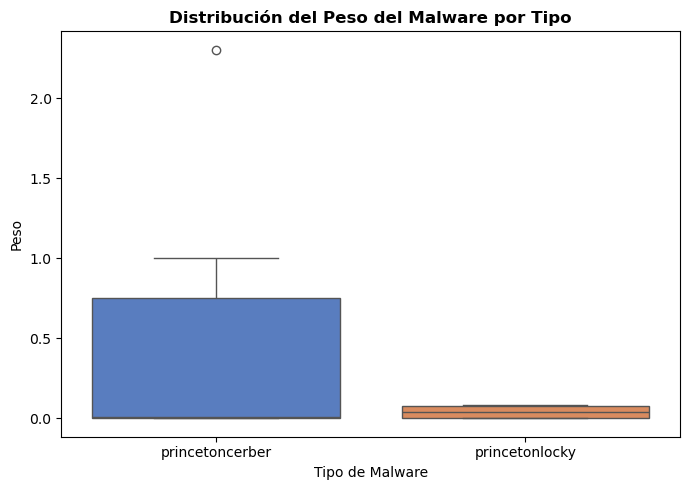

In [10]:

# Seleccionar solo las primeras 10 filas
df_first_10 = df.head(10)

# 4. Boxplot: Distribución del peso del malware por etiqueta
plt.figure(figsize=(7, 5))
sns.boxplot(x="label", y="weight", data=df_first_10, palette="muted")
plt.title("Distribución del Peso del Malware por Tipo", fontsize=12, fontweight="bold")
plt.xlabel("Tipo de Malware")
plt.ylabel("Peso")
plt.tight_layout()
plt.show()